In [84]:
import tensorflow as tf
import pandas as pd
import keras
import matplotlib.pyplot as plt
from keras import layers, regularizers

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [85]:
data = pd.read_csv('comportamiento_completo.csv')
X = data[['X', 'Y', 'Z', 'Energy', 'Temp']]
y = data[['comportamiento']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [86]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [97]:
#Entrada
entrada = keras.Input(shape=(5,))

# Capas ocultas con regularización L2 y Dropout para evitar sobreajuste
x = layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01))(entrada)
x = layers.Dropout(0.4)(x)
x = layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.Dropout(0.4)(x)
x = layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.Dropout(0.4)(x)
salida = keras.layers.Dense(1, activation='sigmoid')(x)
modelo3 = keras.Model(inputs = entrada, outputs = salida)

In [99]:
modelo3.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),
                loss='binary_crossentropy', 
                metrics=['accuracy', 'Precision', 'Recall', 'AUC'])
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = keras.callbacks.ModelCheckpoint('mejor_modelo.keras', save_best_only=True, monitor='val_loss')

modelo3.summary()

historial = modelo3.fit(X_train, y_train,
                       epochs=300,
                       batch_size=64,
                       validation_data=(X_test, y_test),
                       callbacks=[early_stopping, model_checkpoint])

Model: "functional_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_21 (InputLayer)     │ (None, 5)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_92 (Dense)                │ (None, 32)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_93 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_94 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_95 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,009 (3.94 KB)

 Trainable params: 1,009 (3.94 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
13588/13588 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - AUC: 0.6453 - Precision: 0.6507 - Recall: 0.5351 - accuracy: 0.6092 - loss: 0.7220 - val_AUC: 0.7196 - val_Precision: 0.7143 - val_Recall: 0.5507 - val_accuracy: 0.6532 - val_loss: 0.6520
Epoch 2/300
13588/13588 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - AUC: 0.6950 - Precision: 0.6964 - Recall: 0.5826 - accuracy: 0.6525 - loss: 0.6604 - val_AUC: 0.7340 - val_Precision: 0.7311 - val_Recall: 0.6467 - val_accuracy: 0.6938 - val_loss: 0.6375
Epoch 3/300
13588/13588 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - AUC: 0.7146 - Precision: 0.7095 - Recall: 0.6249 - accuracy: 0.6738 - loss: 0.6507 - val_AUC: 0.7439 - val_Precision: 0.7338 - val_Recall: 0.6518 - val_accuracy: 0.6972 - val_loss: 0.6299
Epoch 4/300
13588/13588 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - AUC: 0.7200 - Precision: 0.7113 - Recall: 0.6365 - accuracy: 0.6783 - loss: 0.6456 - val_AUC: 0.7469 - val_Precision: 0.7419 - val_Recall: 0.6498 - val_accuracy: 0.7015 - val_loss: 0.6255
Epoch 5/

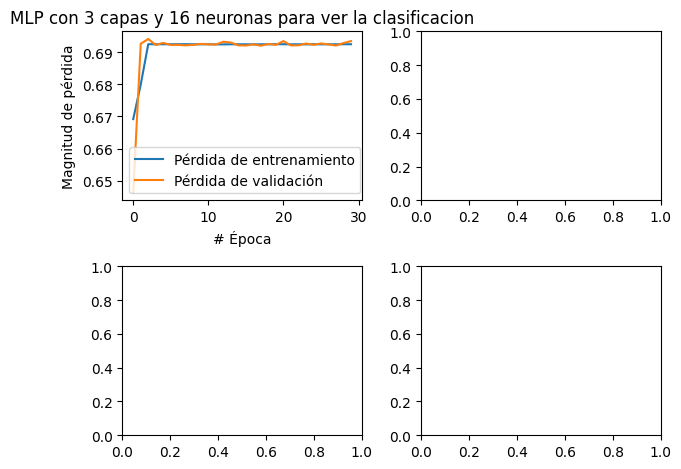

In [77]:
#MLP con 4 capas y varias neuronas
loss3 = historial3.history['loss']
val_loss3 = historial3.history['val_loss']

# Graficar la pérdida de entrenamiento y validación
fig, axs = plt.subplots(2, 2)
axs[0][0].set_title('MLP con 3 capas y 16 neuronas para ver la clasificacion')
axs[0][0].set_xlabel("# Época")
axs[0][0].set_ylabel("Magnitud de pérdida")
axs[0][0].plot(loss3, label='Pérdida de entrenamiento')
axs[0][0].plot(val_loss3, label='Pérdida de validación')
axs[0][0].legend()

fig.tight_layout()
plt.show()

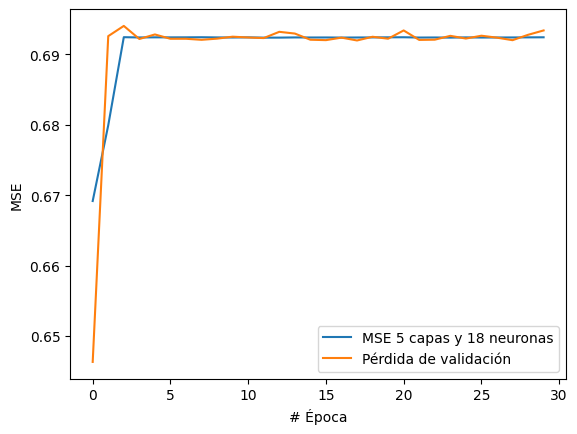

In [82]:
#MLP con 4 capas y varias neuronas
mse3 = historial3.history['loss']

plt.xlabel("# Época")
plt.ylabel("MSE")
plt.plot(mse3, label='MSE 5 capas y 18 neuronas')
plt.plot(historial3.history['val_loss'], label='Pérdida de validación')
plt.legend()
plt.show()